In [223]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
from plyfile import PlyData, PlyElement

from sklearn.decomposition import PCA
from sklearn import preprocessing


In [224]:
# Look pretty...

# matplotlib.style.use('ggplot')
plt.style.use('ggplot')

In [225]:
# Do * NOT * alter this line, until instructed! (changed to TRUE)
scaleFeatures = True

In [226]:
colors = []

In [227]:
def scaleFeaturesDF(df):
    # Feature scaling is a type of transformation that only changes the
    # scale, but not number of features. Because of this, we can still
    # use the original dataset's column names... so long as we keep in
    # mind that the _units_ have been altered:

    scaled = preprocessing.StandardScaler().fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    
    print("New Variances:\n", scaled.var())
    print("New Describe:\n", scaled.describe())
    return scaled

In [228]:
def drawVectors(transformed_features, components_, columns, plt, scaled):
    if not scaled:
        return plt.axes() # No cheating ;-)

    num_columns = len(columns)

    # This funtion will project your *original* feature (columns)
    # onto your principal component feature-space, so that you can
    # visualize how "important" each one was in the
    # multi-dimensional scaling

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ## visualize projections

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

    ax = plt.axes()

    for i in range(num_columns):
        # Use an arrow to project each original feature as a
        # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax

In [229]:
X=pd.read_csv('train_values.csv',header=0,na_values='?',index_col=0)
y=pd.read_csv('train_labels.csv',header=0,na_values='?',index_col=0)

In [230]:
Xy=pd.concat([X,y],axis=1)

In [231]:
Xy

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area,height,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,
765,8,501,3237,2,25,33,4,d502,337f,7e76,...,0,0,0,0,0,0,0,0,0,2
9470,7,288,1819,3,15,28,5,d502,337f,7e76,...,0,0,0,0,0,0,0,0,0,3
14461,14,36,838,1,20,37,2,d502,337f,7e76,...,1,0,0,0,0,0,0,0,0,2
9317,8,81,805,2,5,18,3,d502,337f,7e76,...,0,0,0,0,0,0,0,0,0,2
15941,23,380,4266,3,0,39,6,d502,337f,7e76,...,0,0,0,0,0,0,0,0,0,3
4767,2,22,5,1,10,24,1,d502,337f,e0e2,...,0,0,0,0,0,0,0,0,0,2
5117,13,531,2699,2,5,24,4,d502,337f,7e76,...,0,0,0,0,0,0,0,0,0,2
4081,2,50,412,2,5,20,4,808e,6c3e,e0e2,...,0,0,0,0,0,0,0,0,0,3
11259,2,100,640,2,10,29,3,d502,337f,e0e2,...,0,0,0,0,0,0,0,0,0,2


In [232]:
y.dtypes

damage_grade    int64
dtype: object

In [233]:
Xy.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area,height,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000
mean,7.135600,296.930300,2678.617900,2.146700,25.393500,38.438100,4.653100,0.089700,0.762600,0.02990,...,0.029400,0.006400,0.00070,0.00070,0.000800,0.000200,0.000200,0.0001,0.005300,2.248800
std,6.225567,279.390651,2520.663769,0.736365,64.482893,21.265883,1.792842,0.285766,0.425511,0.17032,...,0.168933,0.079748,0.02645,0.02645,0.028274,0.014141,0.014141,0.0100,0.072612,0.611993
min,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000
25%,2.000000,60.000000,606.750000,2.000000,10.000000,26.000000,4.000000,0.000000,1.000000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,2.000000
50%,6.000000,219.000000,1937.500000,2.000000,15.000000,34.000000,5.000000,0.000000,1.000000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,2.000000
75%,10.000000,466.000000,4158.000000,3.000000,30.000000,44.000000,5.000000,0.000000,1.000000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,3.000000
max,30.000000,1411.000000,12151.000000,9.000000,995.000000,425.000000,30.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.0000,1.000000,3.000000


In [234]:
Xy.groupby(['damage_grade'])['age'].mean()

damage_grade
1    12.633262
2    26.965046
3    26.301810
Name: age, dtype: float64

In [235]:
Xy.groupby(['damage_grade'])['height'].mean()

damage_grade
1    4.415778
2    4.670334
3    4.689726
Name: height, dtype: float64

In [236]:
Xy.groupby(['damage_grade'])['height'].median()

damage_grade
1    4
2    5
3    5
Name: height, dtype: int64

In [237]:
Xy.groupby(['damage_grade'])['area'].mean()

damage_grade
1    46.320896
2    38.464336
3    36.236719
Name: area, dtype: float64

In [238]:
Xy.groupby(['damage_grade'])['area'].count()

damage_grade
1     938
2    5636
3    3426
Name: area, dtype: int64

In [239]:
Xy.groupby(['damage_grade']).count()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area,height,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
damage_grade,,,,,,,,,,,,,,,,,,,,,
1,938,938,938,938,938,938,938,938,938,938,...,938,938,938,938,938,938,938,938,938,938
2,5636,5636,5636,5636,5636,5636,5636,5636,5636,5636,...,5636,5636,5636,5636,5636,5636,5636,5636,5636,5636
3,3426,3426,3426,3426,3426,3426,3426,3426,3426,3426,...,3426,3426,3426,3426,3426,3426,3426,3426,3426,3426


In [240]:
Xy.area.mean()

38.4381

In [241]:
Xy.height.mean()

4.6531

In [242]:
#data_points=Xy.loc[:,('geo_level_1_id','geo_level_2_id', 'geo_level_3_id','count_floors_pre_eq','age','area','height', 'count_families', 'has_superstructure_mud_mortar_stone','has_superstructure_adobe_mud', 'has_secondary_use_hotel','has_secondary_use_rental','has_secondary_use_institution', 'has_secondary_use_other','damage_grade')].copy()
data_points1 = Xy.loc[:,('geo_level_1_id','geo_level_2_id', 'geo_level_3_id', 'damage_grade')].copy()
data_points2= Xy.loc[:,('count_floors_pre_eq','age','area','height', 'damage_grade','count_families')].copy()
data_points3= Xy.loc[:,('has_superstructure_mud_mortar_stone','has_superstructure_adobe_mud', 'has_secondary_use_hotel','has_secondary_use_rental','has_secondary_use_institution', 'has_secondary_use_other','damage_grade')].copy()

In [243]:
Xy.loc[Xy.age > 100, 'age'] = np.nan
Xy.loc[Xy.area > 199, 'area'] = np.nan
#Xy.loc[Xy.height > 12, 'height'] = np.nan
#Xy.loc[Xy.count_families > 3, 'count_families'] = np.nan
#Xy.loc[Xy.count_floors_pre_eq > 5, 'count_floors_pre_eq'] = np.nan
Xy.loc[Xy.geo_level_1_id == 0, 'geo_level_1_id'] = np.nan
Xy.loc[Xy.geo_level_2_id == 0, 'geo_level_2_id'] = np.nan
Xy.loc[Xy.geo_level_3_id == 0, 'geo_level_3_id'] = np.nan

In [244]:
Xy.fillna(round(Xy.median()),inplace=True)

In [246]:
Xy['count_floors_pre_eq']=Xy.count_floors_pre_eq.astype(np.int64)
Xy['count_families']=Xy.count_families.astype(np.int64)
Xy['age']=Xy.age.astype(np.int64)
Xy['area']=Xy.area.astype(np.int64)
Xy['height']=Xy.height.astype(np.int64)
Xy['geo_level_1_id']=Xy.geo_level_1_id.astype(np.int64)
Xy['geo_level_2_id']=Xy.geo_level_2_id.astype(np.int64)
Xy['geo_level_3_id']=Xy.geo_level_3_id.astype(np.int64)
Xy['count_families']=Xy.count_families.astype(np.int64)
Xy['has_secondary_use']=Xy.has_secondary_use.astype(np.int64)

In [248]:
Xy.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area,height,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000
mean,7.677400,300.462800,2683.293100,2.146700,21.181500,38.142200,4.653100,0.089700,0.762600,0.02990,...,0.029400,0.006400,0.00070,0.00070,0.000800,0.000200,0.000200,0.0001,0.005300,2.248800
std,5.829436,277.026219,2517.495486,0.736365,18.656537,19.373722,1.792842,0.285766,0.425511,0.17032,...,0.168933,0.079748,0.02645,0.02645,0.028274,0.014141,0.014141,0.0100,0.072612,0.611993
min,1.000000,1.000000,1.000000,1.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000
25%,3.000000,67.750000,615.000000,2.000000,10.000000,26.000000,4.000000,0.000000,1.000000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,2.000000
50%,6.000000,225.000000,1948.000000,2.000000,15.000000,34.000000,5.000000,0.000000,1.000000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,2.000000
75%,10.000000,466.000000,4158.000000,3.000000,30.000000,44.000000,5.000000,0.000000,1.000000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,3.000000
max,30.000000,1411.000000,12151.000000,9.000000,100.000000,191.000000,30.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.0000,1.000000,3.000000


In [249]:
Xy.groupby(['count_families']).count()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area,height,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count_families,,,,,,,,,,,,,,,,,,,,,
0,803,803,803,803,803,803,803,803,803,803,...,803,803,803,803,803,803,803,803,803,803
1,8672,8672,8672,8672,8672,8672,8672,8672,8672,8672,...,8672,8672,8672,8672,8672,8672,8672,8672,8672,8672
2,433,433,433,433,433,433,433,433,433,433,...,433,433,433,433,433,433,433,433,433,433
3,70,70,70,70,70,70,70,70,70,70,...,70,70,70,70,70,70,70,70,70,70
4,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
5,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
6,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
7,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [250]:
Xy.groupby(['height']).count()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area,land_surface_condition,foundation_type,roof_type,ground_floor_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
height,,,,,,,,,,,,,,,,,,,,,
1,123,123,123,123,123,123,123,123,123,123,...,123,123,123,123,123,123,123,123,123,123
2,813,813,813,813,813,813,813,813,813,813,...,813,813,813,813,813,813,813,813,813,813
3,1507,1507,1507,1507,1507,1507,1507,1507,1507,1507,...,1507,1507,1507,1507,1507,1507,1507,1507,1507,1507
4,2298,2298,2298,2298,2298,2298,2298,2298,2298,2298,...,2298,2298,2298,2298,2298,2298,2298,2298,2298,2298
5,2820,2820,2820,2820,2820,2820,2820,2820,2820,2820,...,2820,2820,2820,2820,2820,2820,2820,2820,2820,2820
6,1355,1355,1355,1355,1355,1355,1355,1355,1355,1355,...,1355,1355,1355,1355,1355,1355,1355,1355,1355,1355
7,561,561,561,561,561,561,561,561,561,561,...,561,561,561,561,561,561,561,561,561,561
8,216,216,216,216,216,216,216,216,216,216,...,216,216,216,216,216,216,216,216,216,216
9,144,144,144,144,144,144,144,144,144,144,...,144,144,144,144,144,144,144,144,144,144


In [251]:
labels = ['red' if i==1 else 'green' if i==2 else 'yellow' for i in Xy.damage_grade]

In [252]:
X01=Xy[Xy.damage_grade==1]
X02=Xy[Xy.damage_grade==2]
X03=Xy[Xy.damage_grade==3]

In [253]:
X01

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area,height,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,
15616,1,23,283,2,15,14,4,2f15,858b,7e76,...,0,0,0,0,0,0,0,0,0,1
15691,10,276,1658,2,5,30,3,d502,337f,7e76,...,0,0,0,0,0,0,0,0,0,1
14111,10,724,6771,2,35,53,3,d502,337f,7e76,...,0,0,0,0,0,0,0,0,0,1
8105,12,3,76,4,5,65,11,d502,467b,67f9,...,0,0,0,0,0,0,0,0,0,1
12875,13,95,611,2,15,63,5,2f15,337f,7e76,...,0,0,0,0,0,0,0,0,0,1
14441,6,16,116,2,0,32,5,d502,467b,67f9,...,0,0,0,0,0,0,0,0,0,1
18899,6,569,2335,2,5,35,6,d502,858b,7e76,...,0,0,0,0,0,0,0,0,0,1
6442,1,525,5033,2,15,39,3,d502,337f,7e76,...,0,0,0,0,0,0,0,0,0,1
5526,1,225,16,1,20,56,2,d502,337f,7e76,...,0,0,0,0,0,0,0,0,0,1


In [254]:
Xy=Xy.drop(['damage_grade','legal_ownership_status'],axis=1)

In [255]:
X01=X01.drop(['damage_grade','legal_ownership_status'],axis=1)
X02=X02.drop(['damage_grade','legal_ownership_status'],axis=1)
X03=X03.drop(['damage_grade','legal_ownership_status'],axis=1)

In [257]:
Xy=pd.get_dummies(Xy)

In [258]:
X01=pd.get_dummies(X01)
X02=pd.get_dummies(X02)
X03=pd.get_dummies(X03)

In [259]:
X01.dtypes

geo_level_1_id                            int64
geo_level_2_id                            int64
geo_level_3_id                            int64
count_floors_pre_eq                       int64
age                                       int64
area                                      int64
height                                    int64
has_superstructure_adobe_mud              int64
has_superstructure_mud_mortar_stone       int64
has_superstructure_stone_flag             int64
has_superstructure_cement_mortar_stone    int64
has_superstructure_mud_mortar_brick       int64
has_superstructure_cement_mortar_brick    int64
has_superstructure_timber                 int64
has_superstructure_bamboo                 int64
has_superstructure_rc_non_engineered      int64
has_superstructure_rc_engineered          int64
has_superstructure_other                  int64
count_families                            int64
has_secondary_use                         int64
has_secondary_use_agriculture           

In [260]:
X1=Xy.select_dtypes(exclude=['object'])

In [261]:
if scaleFeatures: 
    X1 = scaleFeaturesDF(X1)
    X01 = scaleFeaturesDF(X01)


New Variances:
 geo_level_1_id                            1.0001
geo_level_2_id                            1.0001
geo_level_3_id                            1.0001
count_floors_pre_eq                       1.0001
age                                       1.0001
area                                      1.0001
height                                    1.0001
has_superstructure_adobe_mud              1.0001
has_superstructure_mud_mortar_stone       1.0001
has_superstructure_stone_flag             1.0001
has_superstructure_cement_mortar_stone    1.0001
has_superstructure_mud_mortar_brick       1.0001
has_superstructure_cement_mortar_brick    1.0001
has_superstructure_timber                 1.0001
has_superstructure_bamboo                 1.0001
has_superstructure_rc_non_engineered      1.0001
has_superstructure_rc_engineered          1.0001
has_superstructure_other                  1.0001
count_families                            1.0001
has_secondary_use                         1.0001
has_

In [262]:
# .. your code here ..
pca = PCA(n_components=2)
T=pca.fit_transform(X1) 

In [263]:
pca1 = PCA(n_components=2)
T01=pca1.fit_transform(X01)

In [264]:
T.shape

(10000, 2)

Features by importance:
 [(4.701318821603929, 'count_floors_pre_eq'), (4.508780555680769, 'roof_type_67f9'), (4.50589586998077, 'ground_floor_type_467b'), (4.310414273684681, 'height'), (4.096905934020668, 'foundation_type_337f'), (4.064827983218324, 'other_floor_type_67f9'), (4.009274031522712, 'foundation_type_467b'), (3.7354360850816133, 'other_floor_type_441a'), (3.6362229790593594, 'ground_floor_type_b1b4'), (3.607125367714016, 'has_superstructure_mud_mortar_stone'), (3.4556972687748186, 'other_floor_type_f962'), (3.335813637269867, 'has_superstructure_cement_mortar_brick'), (2.9989707644629346, 'position_3356'), (2.834669625323135, 'age'), (2.6209215030852286, 'has_superstructure_rc_non_engineered'), (2.609109685280133, 'has_superstructure_rc_engineered'), (2.5885717581702803, 'has_superstructure_mud_mortar_brick'), (2.4394318194719706, 'geo_level_2_id'), (2.422415698311577, 'area'), (2.3298284404860414, 'position_bcab'), (2.2776730533810183, 'foundation_type_6c3e'), (2.246719072

<IPython.core.display.Javascript object>


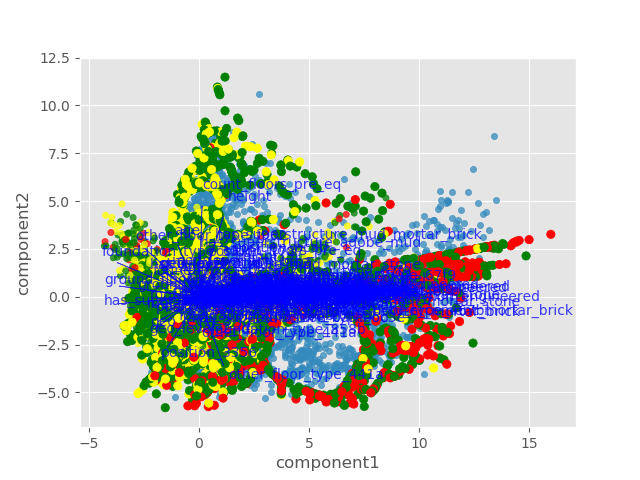

In [265]:
# Since we transformed via PCA, we no longer have column names; but we know we
# are in `principal-component` space, so we'll just define the coordinates accordingly:
ax = drawVectors(T, pca.components_, X1.columns.values, plt, scaleFeatures)
T  = pd.DataFrame(T)

T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', alpha=0.75, ax=ax)

plt.show()

In [267]:
##Isomap from PCA

from sklearn import manifold

iso=manifold.Isomap(n_neighbors=4,n_components=3)
iso.fit(T)
iso_T=iso.transform(T)

In [268]:
iso.fit(X01)
iso_T01=iso.transform(X01)

In [269]:
plt.scatter(iso_T[:,0],iso_T[:,1],marker='o',c=labels)
plt.show()

<IPython.core.display.Javascript object>


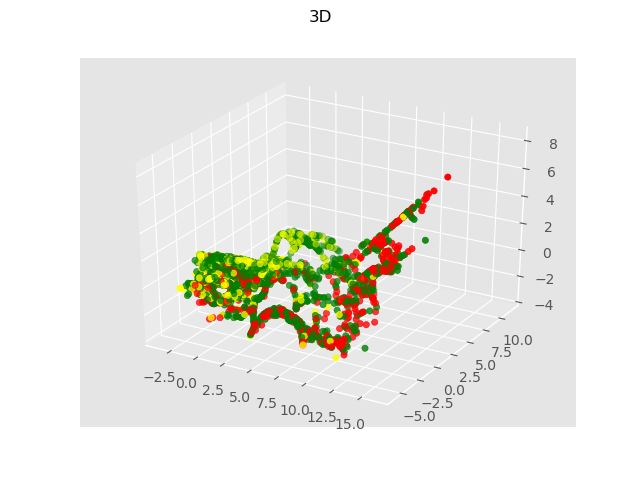

In [270]:
fig=plt.figure()

ax=fig.add_subplot(111,projection='3d')
ax.scatter(iso_T[:,0],iso_T[:,1],iso_T[:,2],marker='o',c=labels)
plt.suptitle('3D')
plt.show()

<IPython.core.display.Javascript object>


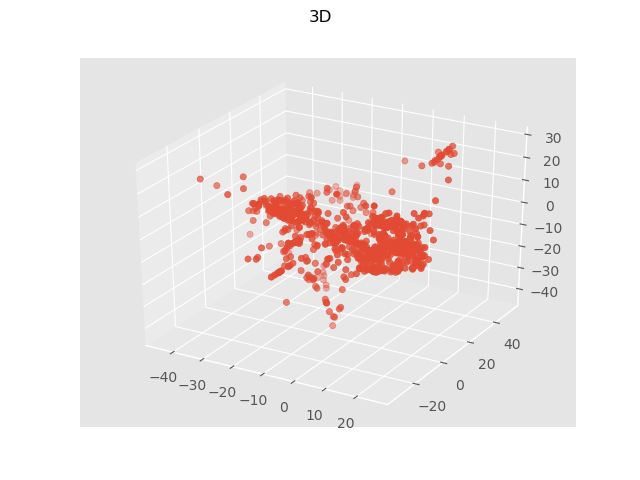

In [271]:
fig=plt.figure()

ax=fig.add_subplot(111,projection='3d')
ax.scatter(iso_T01[:,0],iso_T01[:,1],iso_T01[:,2],marker='o')
plt.suptitle('3D')
plt.show()